# Código - Trabajo Práctico 1 - Machine Learning


### Etapa 1: Scraping

In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data = []

headers = []

for i in range(1,11):
    url = f'https://ignaciomsarmiento.github.io/GEIH2018_sample/pages/geih_page_{i}.html'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table')
        
        if i == 1:
            for header in table.find_all('th'):
                headers.append(header.text.strip())
            
        data.append(headers)
        
        for row in table.find_all('tr'):
            row_data = []
            for cell in row.find_all('td'):
                row_data.append(cell.text.strip())
            if row_data:
                data.append(row_data)
        
    

In [3]:
# Transformamos la lista resultante en un dataframe utilizando la lista "headers" para los nombres de las columnas.

df = pd.DataFrame(data, columns=headers)
print(df.shape)
df

(32187, 178)


,,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
0,,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
1,1,4514331,1,2,1,BOGOTA,1,2,0,29,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,4514331,1,1,1,BOGOTA,1,2,1,36,...,NA,NA,NA,8404.3203125,NA,NA,NA,NA,1620833.25,8404.3203125
3,3,4514332,1,4,1,BOGOTA,1,2,1,4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,4,4514332,1,3,1,BOGOTA,1,2,1,7,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32182,3213,4804454,1,2,1,BOGOTA,12,2,0,24,...,NA,NA,NA,3345.5556640625,NA,NA,NA,NA,1003666.6875,3345.5556640625
32183,3214,4804455,1,1,1,BOGOTA,12,3,0,36,...,5e+05,NA,NA,25958.333984375,NA,NA,NA,NA,6675000,25958.333984375
32184,3215,4804455,1,2,1,BOGOTA,12,3,1,41,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
32185,3216,4804455,1,3,1,BOGOTA,12,3,1,8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Etapa 2: Data cleaning

In [6]:
# Según las condiciones de la consigna, debemos quedarnos con:
# Individuos con una edad igual o superior a los 18 años.
# Evitar NAs que distorsionen los procedimientos.
# Individuos que tienen ingresos laborales mayores a cero.

# Transformamos a variable númerica la edad
df['age'] = pd.to_numeric(df['age'], errors='coerce').fillna(0).astype(int)


# Filtramos por edad
df_18 = df[df['age']>= 18]

# Reemplazamos con 0 aquellas que tienen NA
df_18 = df_18.replace("NA",0)

# Filtramos por ingreso positivo
df_18 = df_18[df_18['y_salary_m_hu'] != 0]

# Transformo el tipo de variable. Comenzamos por una selección de las mismas

variables = ['estrato1','sex','age', 'formal','fweight','maxEducLevel','y_salary_m_hu', 'y_ingLab_m']

for v in variables:
    df_18[v] = df_18[v].astype(float)

In [7]:
# El dataset resultante queda de la siguiente manera
print(f"El dataset cuenta con un total de {df_18.shape[0]} observaciones")

df_18

El dataset cuenta con un total de 9892 observaciones


,,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,...,y_viaticos_m,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha
2,2,4514331,1,1,1,BOGOTA,1,2.00,1.00,36.00,...,0,0,0,8404.3203125,0,0,0,0,1620833.25,8404.3203125
9,9,4514333,1,1,1,BOGOTA,1,2.00,1.00,51.00,...,0,0,0,6703.3427734375,0,0,0,0,1378973.375,6703.3427734375
14,14,4514334,1,1,1,BOGOTA,1,2.00,1.00,45.00,...,0,0,0,3680.65405273438,0,0,0,0,883357,3680.65405273438
16,16,4514335,1,1,1,BOGOTA,1,2.00,1.00,61.00,...,0,0,0,4083.33325195312,0,0,0,0,7e+05,4083.33325195312
22,22,4514338,1,2,1,BOGOTA,1,2.00,0.00,35.00,...,0,0,0,9437.84765625,0,0,0,0,1941500.125,9437.84765625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32174,3205,4804453,1,6,1,BOGOTA,12,3.00,1.00,24.00,...,0,0,0,5288.888671875,0,0,0,0,1088000,5288.888671875
32176,3207,4804453,1,8,1,BOGOTA,12,3.00,0.00,50.00,...,0,0,0,4864.12744140625,0,0,0,0,1146544.375,4864.12744140625
32181,3212,4804454,1,1,1,BOGOTA,12,2.00,1.00,27.00,...,0,0,0,4453.359375,0,0,0,0,916119.6875,4453.359375
32182,3213,4804454,1,2,1,BOGOTA,12,2.00,0.00,24.00,...,0,0,0,3345.5556640625,0,0,0,0,1003666.6875,3345.5556640625


In [8]:
# Realizamos una selección de variables

df_18 = df_18[['directorio', 'secuencia_p', 'orden', 'clase','estrato1', 'sex', 'age', 'formal','fweight', 'maxEducLevel',
              'y_salary_m_hu','y_total_m']]

df_18

,directorio,secuencia_p,orden,clase,estrato1,sex,age,formal,fweight,maxEducLevel,y_salary_m_hu,y_total_m
2,4514331,1,1,1,2.00,1.00,36.00,1.00,255.00,6.00,6740.74,1620833.25
9,4514333,1,1,1,2.00,1.00,51.00,1.00,194.00,7.00,5833.33,1378973.375
14,4514334,1,1,1,2.00,1.00,45.00,1.00,243.00,4.00,3073.82,883357
16,4514335,1,1,1,2.00,1.00,61.00,0.00,230.00,3.00,4083.33,7e+05
22,4514338,1,2,1,2.00,0.00,35.00,1.00,342.00,7.00,8263.89,1941500.125
...,...,...,...,...,...,...,...,...,...,...,...,...
32174,4804453,1,6,1,3.00,1.00,24.00,1.00,233.00,7.00,5045.83,1088000
32176,4804453,1,8,1,3.00,0.00,50.00,1.00,233.00,6.00,4310.30,1146544.375
32181,4804454,1,1,1,2.00,1.00,27.00,1.00,387.00,6.00,3797.70,916119.6875
32182,4804454,1,2,1,2.00,0.00,24.00,1.00,387.00,6.00,3000.00,1003666.6875


### Etapa 3: Análisis descriptivo

In [9]:
# La función summarize busca replicar el comando del mismo nombre que se utiliza en STATA.

def summarize(df, x, ponder):
    """
    Función que devuelve una tabla de estadísticas principales con ponderadores
    
    """
    mean_w = np.average(df[x], weights = df[ponder]) # Obtención de la media ponderada
    std_w = np.sqrt(
    np.average(
        (df[x] - np.average(df[x], weights=df[ponder]))**2,
        weights=df[ponder]
    ) * (len(df[x]) / (len(df[x]) - 1)) # Cálculo manual del desvío estandar ajustandolo por N-1 grados de libertad
)

    total_obs = df[ponder].sum() # Total de observaciones en función de la sumatoria de la columna del ponderador
    minimo = df[x].min() # El valor mínimo del conjunto de datos
    maximo = df[x].max() # El valor máximo del conjunto de datos
    return mean_w, std_w, total_obs, minimo, maximo

(7954.872543304392, 11666.212477509967, 2471327.0, 151.909729003906, 291666.65625)


<AxesSubplot:xlabel='y_salary_m_hu', ylabel='Density'>

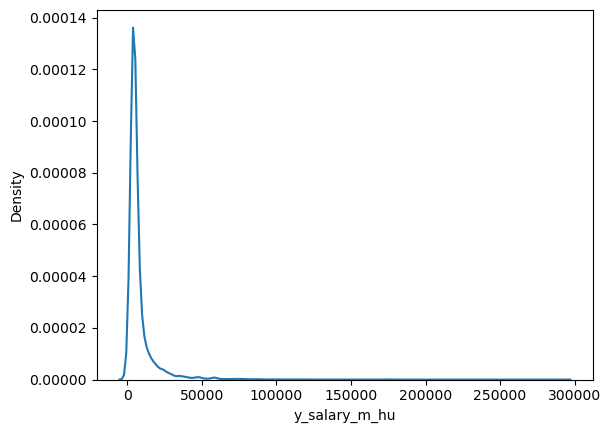

In [10]:
# Total de la muestra: resumen respecto del ingreso total mensual

print(summarize(df_18, 'y_salary_m_hu', 'fweight'))

# Gráfico de densidad

sns.kdeplot(data=df_18, x='y_salary_m_hu')

(8107.321971498056, 12378.894775511462, 1254711.0, 518.518493652344, 291666.65625)
(7797.649578541228, 10881.480698978243, 1216616.0, 151.909729003906, 175000.0)


<AxesSubplot:xlabel='y_salary_m_hu', ylabel='Density'>

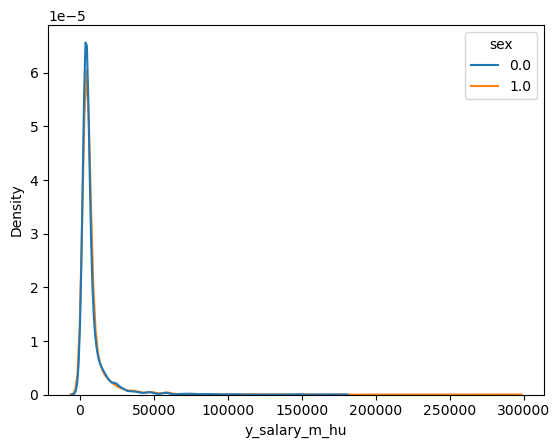

In [11]:
# Distinción por género

df_18_v = df_18[df_18['sex']==1.0]

df_18_m = df_18[df_18['sex']==0.0]


print(summarize(df_18_v, 'y_salary_m_hu', 'fweight'))
print(summarize(df_18_m, 'y_salary_m_hu', 'fweight'))

# Gráfico de densidad

sns.kdeplot(data=df_18, x='y_salary_m_hu', hue="sex")

(9101.311393768345, 12768.225282587, 1897599.0, 151.909729003906, 291666.65625)
(4163.038754119365, 5323.393724111371, 573728.0, 326.666656494141, 136111.109375)


<AxesSubplot:xlabel='y_salary_m_hu', ylabel='Density'>

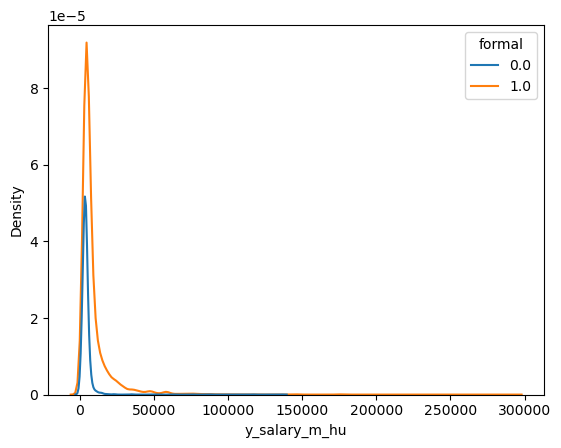

In [12]:
# Distinción por formalidad

df_18_f = df_18[df_18['formal']==1.0]

df_18_i = df_18[df_18['formal']==0.0]


print(summarize(df_18_f, 'y_salary_m_hu', 'fweight'))
print(summarize(df_18_i, 'y_salary_m_hu', 'fweight'))

# Gráfico de densidad

sns.kdeplot(data=df_18, x='y_salary_m_hu', hue="formal")

#### Disclaimer - data cleaning

Dado que la distribución de ingresos laborales presenta una asimetría negativa, es decir, que los valores altos de salarios elevan la media, procedemos a generar una transformación de esta variable aplicando logaritmo natural.

In [13]:
# Aplicación de logaritmo natural

df_18['ly_salary_m_hu'] = np.log(df_18['y_salary_m_hu'])

C:\Users\Emiliano\AppData\Local\Temp\ipykernel_15348\1303915280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18['ly_salary_m_hu'] = np.log(df_18['y_salary_m_hu'])


#### Disclaimer - análisis descriptivo

Dada la nueva variable logarítmica, realizamos el mismo análisis descriptivo que antes.

(8.616704064836187, 0.7232335535757305, 2471327.0, 5.023286456292669, 12.583366840957355)


<AxesSubplot:xlabel='ly_salary_m_hu', ylabel='Density'>

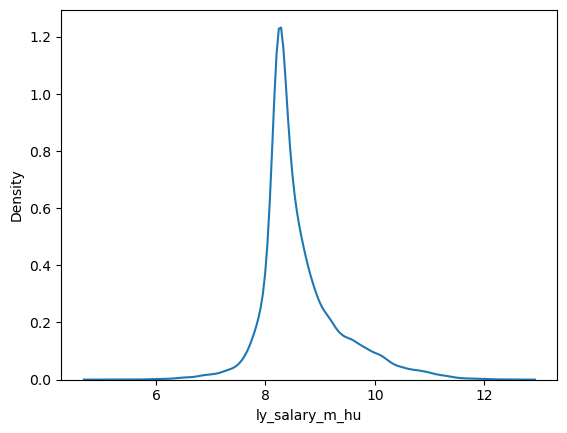

In [14]:
# Total de la muestra: resumen respecto del ingreso total mensual

print(summarize(df_18, 'ly_salary_m_hu', 'fweight'))

# Gráfico de densidad

sns.kdeplot(data=df_18, x='ly_salary_m_hu')

(8.638386789912433, 0.7055044134803878, 1254711.0, 6.250975694636872, 12.583366840957355)
(8.594342404572686, 0.7404813236670225, 1216616.0, 5.023286456292669, 12.072541252905651)


<AxesSubplot:xlabel='ly_salary_m_hu', ylabel='Density'>

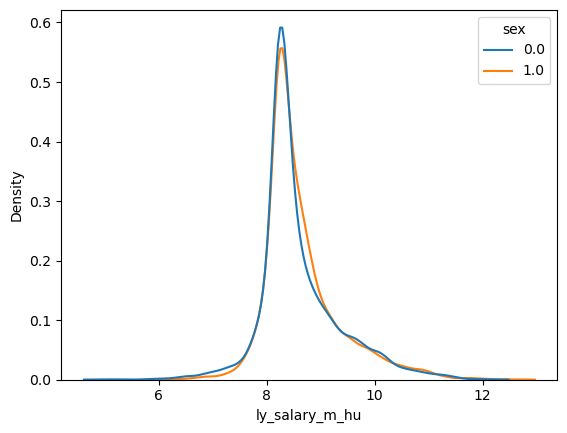

In [15]:
# Distinción por género

df_18_v = df_18[df_18['sex']==1.0]

df_18_m = df_18[df_18['sex']==0.0]


print(summarize(df_18_v, 'ly_salary_m_hu', 'fweight'))
print(summarize(df_18_m, 'ly_salary_m_hu', 'fweight'))

# Gráfico de densidad

sns.kdeplot(data=df_18, x='ly_salary_m_hu', hue="sex")

(8.756256838888953, 0.7139360336251306, 1897599.0, 5.023286456292669, 12.583366840957355)
(8.155134811653925, 0.5384447105160434, 573728.0, 5.788940251856123, 11.821226811869643)


<AxesSubplot:xlabel='ly_salary_m_hu', ylabel='Density'>

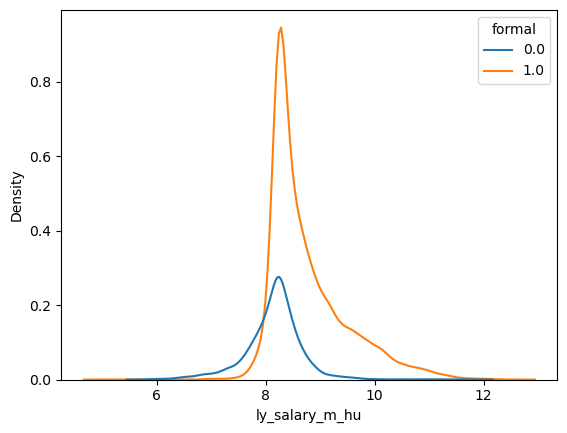

In [16]:
# Distinción por formalidad

df_18_f = df_18[df_18['formal']==1.0]

df_18_i = df_18[df_18['formal']==0.0]


print(summarize(df_18_f, 'ly_salary_m_hu', 'fweight'))
print(summarize(df_18_i, 'ly_salary_m_hu', 'fweight'))

# Gráfico de densidad

sns.kdeplot(data=df_18, x='ly_salary_m_hu', hue="formal")

### Etapa 4: Análisis predictivo

In [17]:
# Variables independientes para la predicción
X = df_18[['age', 'sex', 'formal', 'estrato1', 'maxEducLevel']]  

# Variable dependiente
y = df_18[['y_salary_m_hu']]

# Dividimos los conjuntos X e Y en entrenamiento y testing.
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size=0.3,
                                        train_size=0.7,
                                        random_state = 123
                                    )

# Modelo de regresión
# Creamos una lista para almacenar las variables acumuladas
variables_acumuladas = []
resultados = []

# Iteramos sobre las columnas de X_train
for x in X_train.columns.values.tolist():
    # Agregamos la nueva variable al conjunto acumulado
    variables_acumuladas.append(x)
    
    # Filtramos las columnas acumuladas en X_train
    X_acumulado = X_train[variables_acumuladas]
    
    # Corremos el modelo de regresión
    reg = LinearRegression().fit(X_acumulado, y_train)
    
    # Realizamos una predicción con el conjunto de testing
    y_hat_model = reg.predict(X_test[variables_acumuladas])
    
    # Guardamos los coeficientes, el intercepto y el R^2 del modelo actual
    resultados.append({
        'variables': variables_acumuladas.copy(),
        'coeficientes': reg.coef_.tolist(),
        'intercepto': reg.intercept_,
        'score': reg.score(X_acumulado, y_train),
        'Y predicha': y_hat_model,
        "RMSE": np.sqrt(mean_squared_error(y_test, y_hat_model)),
        "Error": float(np.sqrt(mean_squared_error(y_test, y_hat_model))/np.mean(y_test))
    })

    
    
# Modelos polinómicos

for i in range(2,7):
    # Realizamos una transformación polinómica y corremos la regresión
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    reg =  LinearRegression().fit(X_train_poly,y_train)
    
    # Realizamos una transformación polinómica y luego la predicción con el conjunto de testing
    X_test_poly = poly.fit_transform(X_test[variables_acumuladas])
    y_hat_model = reg.predict(X_test_poly)
    
    # Guardamos los coeficientes, el intercepto y el R^2 del modelo actual
    resultados.append({
        'variables': variables_acumuladas.copy(),
        'coeficientes': reg.coef_.tolist(),
        'intercepto': reg.intercept_,
        'score': reg.score(X_train_poly, y_train),
        'Y predicha': y_hat_model,
        "RMSE": np.sqrt(mean_squared_error(y_test, y_hat_model)),
        "Error": float(np.sqrt(mean_squared_error(y_test, y_hat_model))/np.mean(y_test))
    })


# Mostramos los resultados de cada modelo
for i, modelo in enumerate(resultados, 1):
    print(f"Modelo {i}:")
    print(f"  Variables: {modelo['variables']}")
    print(f"  Coeficientes: {modelo['coeficientes']}")
    print(f"  Intercepto: {modelo['intercepto']}")
    print(f"  R²: {modelo['score']:.4f}")
    print("-" * 10)
    print(f"  RMSE: {modelo['RMSE']:.2f}")
    print(f"  Error: {modelo['Error']:.2f}")
    print("-" * 40)

Modelo 1:
  Variables: ['age']
  Coeficientes: [[140.5668012997916]]
  Intercepto: [2869.7877086]
  R²: 0.0227
----------
  RMSE: 12387.22
  Error: 1.57
----------------------------------------
Modelo 2:
  Variables: ['age', 'sex']
  Coeficientes: [[141.27050636122954, 547.7574957964114]]
  Intercepto: [2571.04781668]
  R²: 0.0233
----------
  RMSE: 12387.94
  Error: 1.57
----------------------------------------
Modelo 3:
  Variables: ['age', 'sex', 'formal']
  Coeficientes: [[134.1490051905351, 374.21703274219334, 4779.605022451931]]
  Intercepto: [-767.023196]
  R²: 0.0554
----------
  RMSE: 12216.94
  Error: 1.55
----------------------------------------
Modelo 4:
  Variables: ['age', 'sex', 'formal', 'estrato1']
  Coeficientes: [[77.45561216583563, 1082.9116896621672, 3085.9034477666246, 5492.348323832244]]
  Intercepto: [-11594.45973856]
  R²: 0.2784
----------
  RMSE: 10938.95
  Error: 1.39
----------------------------------------
Modelo 5:
  Variables: ['age', 'sex', 'formal', 'e

In [ ]:
# Indicar número de modelo para x

x = 0
modelo = resultados[x]
modelo

### Anexo

In [ ]:
df_18.columns.values.tolist()

In [ ]:
df_18['maxEducLevel'].unique()

In [5]:
df_18.columns.values

array(['', 'directorio', 'secuencia_p', 'orden', 'clase', 'dominio',
       'mes', 'estrato1', 'sex', 'age', 'p6050', 'p6090', 'p6100',
       'p6210', 'p6210s1', 'p6240', 'oficio', 'p6426', 'relab', 'p6500',
       'p6510', 'p6510s1', 'p6510s2', 'p6545', 'p6545s1', 'p6545s2',
       'p6580', 'p6580s1', 'p6580s2', 'p6585s1', 'p6585s1a1', 'p6585s1a2',
       'p6585s2', 'p6585s2a1', 'p6585s2a2', 'p6585s3', 'p6585s3a1',
       'p6585s3a2', 'p6585s4', 'p6585s4a1', 'p6585s4a2', 'p6590',
       'p6590s1', 'p6600', 'p6600s1', 'p6610', 'p6610s1', 'p6620',
       'p6620s1', 'p6630s1', 'p6630s1a1', 'p6630s2', 'p6630s2a1',
       'p6630s3', 'p6630s3a1', 'p6630s4', 'p6630s4a1', 'p6630s6',
       'p6630s6a1', 'p6750', 'p6760', 'p550', 'hoursWorkUsual', 'p6870',
       'p6920', 'p7040', 'hoursWorkActualSecondJob', 'p7050', 'p7070',
       'p7090', 'p7110', 'p7120', 'p7140s1', 'p7140s2', 'p7150', 'p7160',
       'p7310', 'p7350', 'p7422', 'p7422s1', 'p7472', 'p7472s1', 'p7495',
       'p7500s1', 'p75

In [ ]:
formula = f"{dependent_var} ~ {independent_vars[0]}"


lm = smf.ols(formula=formula, data=df_18).fit()
print("Modelo 1:")
print(lm.params)
print("-" * 10)
print('p-Values del modelo:')
print(lm.pvalues)
print("-" * 50)


for i in range(1, len(independent_vars)):
    formula = f"{dependent_var} ~ {' + '.join(independent_vars[:i+1])}" 
    lm = smf.ols(formula=formula, data=df_18).fit()
    print(f"Modelo {i+1}:")
    print(lm.params)
    print("-" * 10)
    print('p-Values del modelo:')
    print(lm.pvalues)
    print("-" * 50)